#### 1. Data Collection (download the training and testing datasets provided from Kaggle)
#### 2. Data Preprocessing (delete outliers)
#### 3. Feature Engineering (exploring the features by plotting function graphs, create new data frame, divide data, standardize data)
#### 4. Model Building (apply LinearRegression, RandomForest, XGBoost)

In [123]:
import pylab
import calendar
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import model_selection, metrics
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [124]:
raw_data = pd.read_csv('C:\\Users\\Dell\\Documents\\bike\\train.csv')
test_raw_data = pd.read_csv('C:\\Users\\Dell\\Documents\\bike\\test.csv')

In [125]:
raw_data.shape

(10886, 12)

In [126]:
raw_data.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [127]:
raw_data.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [128]:
raw_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [129]:
raw_data.isnull().values.any()

False

### EXPLORING THE FEATURES
#### The distribution of various discrete features such as weather , season, working day, holiday

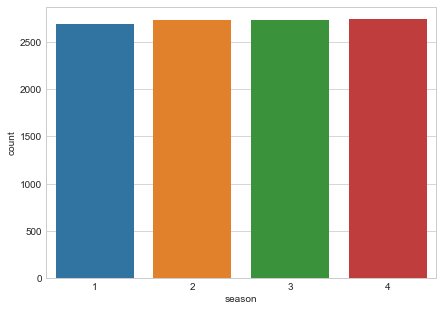

In [130]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x='season',data=raw_data, ax = ax)

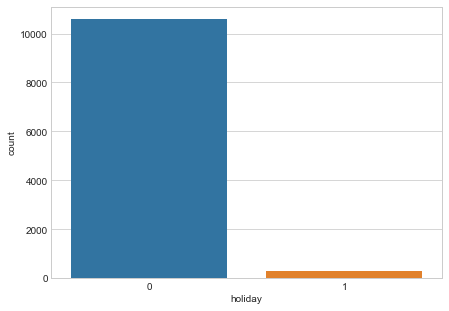

In [131]:
dims = (7, 5)
fig, ax = plt.subplots(figsize = dims)

sns.countplot(x='holiday',data=raw_data, ax = ax) # majority of data is for non holiday days.

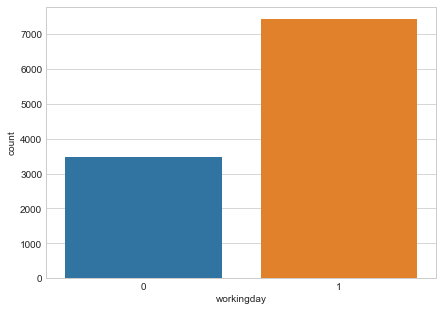

In [132]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(x='workingday',data=raw_data, ax = ax) # majority of data is for working days.

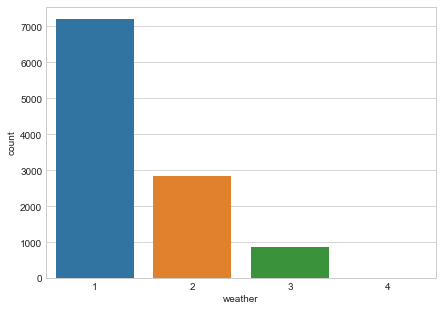

In [133]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(x='weather',data=raw_data, ax = ax) 

#### Correlation between the features

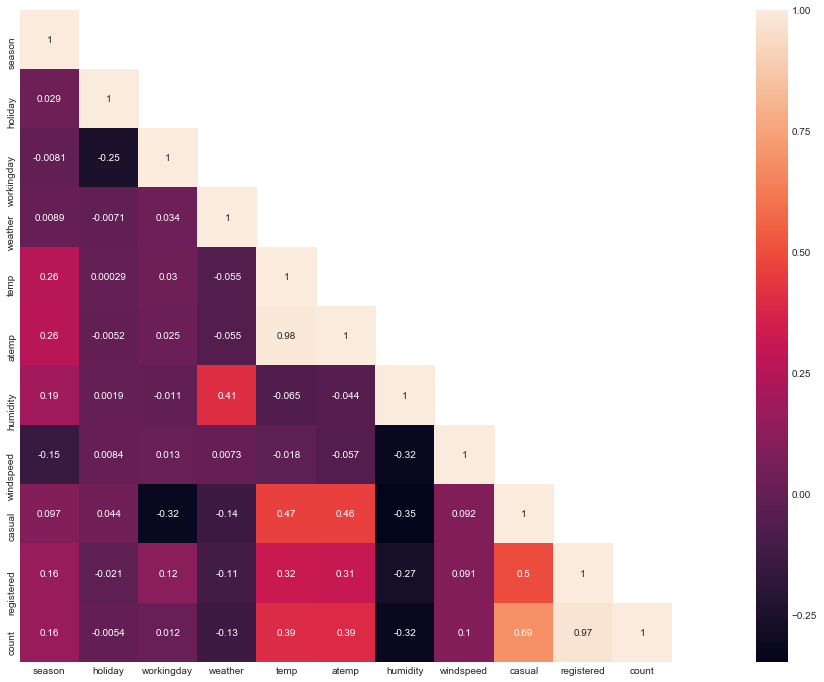

In [134]:
#corelation matrix
cor_mat= raw_data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#### INFERENCES FROM THE ABOVE HEATMAP

Temp and atemp are highly related as expected and highly effects the count.

Humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

Casual and working day are highly inversely related as you would expect.

Count and holiday are highly inversely related as you would expect.

Weather and count are highly inversely related. This is because for our data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

Registered and count are highly related which indicates that most of the bikes that are rented are registered.

In [135]:
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])
raw_data['Hour'] = raw_data['datetime'].apply(lambda time: time.hour)
raw_data['Month'] = raw_data['datetime'].apply(lambda time: time.month)
raw_data['Year'] = raw_data['datetime'].apply(lambda time:time.year)
raw_data['Day of Week'] = raw_data['datetime'].apply(lambda time: time.dayofweek)

In [136]:
raw_data.head(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Year,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,2011,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1,2011,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1,2011,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1,2011,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1,2011,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1,2011,5


##### Box plot

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'Working Day'),
 Text(0.5,1,u'Box Plot On Count Across Working Day')]

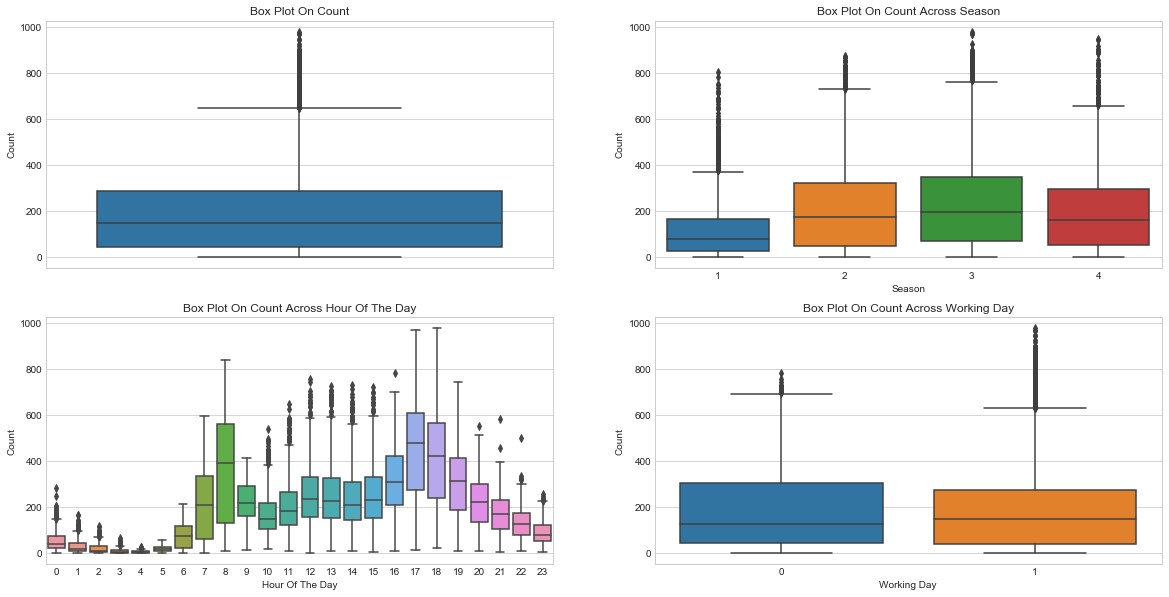

In [137]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=raw_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=raw_data,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=raw_data,y="count",x="Hour",orient="v",ax=axes[1][0])
sns.boxplot(data=raw_data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## Handling The Outliers 

In [138]:
raw_data_without_outliers = raw_data[np.abs(raw_data["count"]-raw_data["count"].mean())<=(3*raw_data["count"].std())] 

In [139]:
print ("Shape Of The Before Ouliers: ",raw_data.shape)
print ("Shape Of The After Ouliers: ",raw_data_without_outliers.shape)

('Shape Of The Before Ouliers: ', (10886, 16))
('Shape Of The After Ouliers: ', (10739, 16))


## Visualizing Distribution Of Data
As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

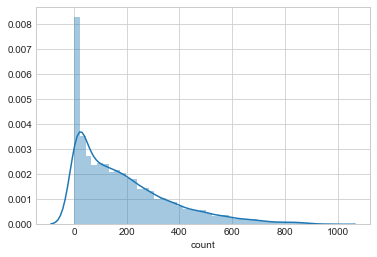

In [140]:
fig.set_size_inches(20, 10)
sns.distplot(raw_data["count"])

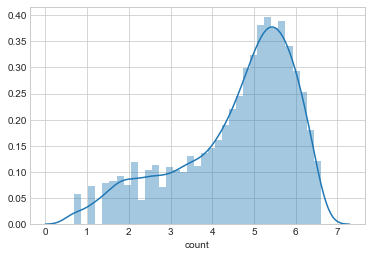

In [141]:
fig.set_size_inches(20, 10)
sns.distplot(np.log1p(raw_data_without_outliers["count"]))

## FEATURE ENGINEERING 
###### Getting some new features and dropping some useless or less relevant reatures.


In [142]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,Year,Day of Week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5


In [143]:
# seperating season as per values. It will enhance features.
season = pd.get_dummies(raw_data['season'],prefix='season')
raw_data = pd.concat([raw_data,season],axis=1)

In [144]:
# same for weather.
weather=pd.get_dummies(raw_data['weather'],prefix='weather')
raw_data=pd.concat([raw_data,weather],axis=1)

In [145]:
# now can delete weather and season.
raw_data.drop(['season','weather'],inplace=True,axis=1)

In [146]:
raw_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,Year,Day of Week,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,2011,5,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,2011,5,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,2011,5,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,2011,5,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,2011,5,1,0,0,0,1,0,0,0


1) “casual” and “registered” attributes are also not taken into account since they are leakage variables in nature and need to be dropped during model building.

2) “atemp” variable is not taken into account since “atemp” and “temp” has strong correlation with each other.

In [147]:
raw_data.drop(['atemp',"casual","registered","datetime"], axis=1, inplace = True)

In [148]:
train_data = raw_data.iloc[:-1000, :] #train - 9886
hold_out_test_data = raw_data.iloc[-1000:, :] #test

In [149]:
train_labels = train_data['count'].values
train_data = train_data.drop('count', axis = 1)

In [150]:
train_data.shape

(9886, 17)

In [152]:
test_labels = hold_out_test_data['count'].values
test_data = hold_out_test_data.drop('count', axis = 1)

In [153]:
from sklearn.preprocessing import StandardScaler #standardize data
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data) 

## Making Scorer

In [156]:
def rmsle(y, y_,convertExp=True): #model quality, RMSE
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## Applying Of Models

#### Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
lModel.fit(X = train_data,y = np.log1p(train_labels))
predsLR = lModel.predict(X= test_data)
print ("RMSLE Value For Linear Regression In Validation: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsLR),False))

('RMSLE Value For Linear Regression In Validation: ', 1.550925494659396)


#### Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor() 
rfModel.fit(X = train_data,y = np.log1p(train_labels))
predsRF = rfModel.predict(X= test_data)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsRF),False))

C:\Users\Dell\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


('RMSLE Value For Random Forest: ', 0.4009196882601371)


#### Gradient Boosting Regressor

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
gbrModel = GradientBoostingRegressor(n_estimators=100) 
gbrModel.fit(X = train_data,y = np.log1p(train_labels))
predsGBR = gbrModel.predict(X= test_data)
print ("RMSLE Value For GradientBoostingRegressor: ",rmsle(np.exp(np.log1p(test_labels)),np.exp(predsGBR),False))

('RMSLE Value For GradientBoostingRegressor: ', 0.3869591398571394)
